In [238]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


In [202]:
df = pd.read_csv('stats.csv', index_col = 0)

In [204]:
features = df.iloc[: , :-2]
target = df.winner

In [209]:
df

,1 Corners,1 Fouls Committed,1 Fouls Wons,1 Goals,1 Offsides,1 Pass Completion,1 Possesion,1 Red Cards,1 Shot Attempts,1 Shots Blocked,...,2 Red Cards,2 Shot Attempts,2 Shots Blocked,2 Total Passes,2 Total Shots on Target,2 Total xG,2 Under Pressure,2 Yellow Cards,winner,fh winner
0,2,1,3,0,1,0.800,0.624,0,2,0,...,0,8,3,175,1,0.876350,0.171,0,2,2
1,2,0,3,0,3,0.903,0.658,0,7,2,...,0,9,6,193,1,0.682699,0.104,0,1,0
2,1,1,6,1,0,0.793,0.468,0,8,4,...,0,5,2,291,0,0.456537,0.096,2,2,0
3,1,2,3,1,0,0.826,0.496,0,5,2,...,0,5,0,304,3,0.162379,0.105,0,1,1
4,3,1,1,0,0,0.784,0.320,0,6,1,...,0,7,0,374,3,0.805794,0.059,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,6,0,1,0,0,0.837,0.628,0,12,3,...,0,0,0,175,0,0.000000,0.206,1,2,0
678,0,4,4,0,1,0.693,0.340,0,0,0,...,0,13,3,316,6,1.904855,0.127,1,2,2
679,2,1,2,1,0,0.571,0.354,0,1,0,...,0,6,2,268,3,0.675959,0.157,0,1,1
680,1,1,3,2,0,0.878,0.665,0,7,1,...,0,2,0,199,1,0.182967,0.131,0,1,1


In [210]:
X_train, X_test, y_train, y_test = train_test_split(features, target)

In [211]:
cl_estimators = {
    'k-Nearest Neighbor': KNeighborsClassifier(), 
    'Gaussian Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(max_iter = 100000)}

In [176]:
def classifiers_models():
    for name, model in cl_estimators.items(): 
        x = model.fit(X=X_train, y = y_train)
        accuracytest = x.score(X_test, y_test)
        accuracytrain = x.score(X_train, y_train)
        print(name + ": \n\t" + "Classification accuracy on the test data:", f"{accuracytest:.2%}")
        print(f"\tClassification accuracy on the training data: {accuracytrain:.2%}\n")

In [177]:
classifiers_models()

k-Nearest Neighbor: 
	Classification accuracy on the test data: 63.74%
	Classification accuracy on the training data: 73.97%

Gaussian Naive Bayes: 
	Classification accuracy on the test data: 65.50%
	Classification accuracy on the training data: 66.73%

Decision Tree: 
	Classification accuracy on the test data: 59.06%
	Classification accuracy on the training data: 100.00%

Logistic Regression: 
	Classification accuracy on the test data: 72.51%
	Classification accuracy on the training data: 74.36%



In [178]:
def cl_model_comp(features, target):
    for name, model in cl_estimators.items():
      kfold = StratifiedKFold(n_splits = 10, random_state = 300, shuffle = True)
      scores = cross_val_score(model, X=features,y=target,cv=kfold)
      print(f'{name}: \n\t mean accuracy={scores.mean():.2%}, standard deviation={scores.std():.2%}\n')

In [179]:
cl_model_comp(features, target)

k-Nearest Neighbor: 
	 mean accuracy=61.71%, standard deviation=4.79%

Gaussian Naive Bayes: 
	 mean accuracy=62.90%, standard deviation=4.60%

Decision Tree: 
	 mean accuracy=61.31%, standard deviation=4.12%

Logistic Regression: 
	 mean accuracy=71.55%, standard deviation=3.20%



In [180]:
def logistic_tuning():
    param_grid = {"solver":["sag", "saga","liblinear","newton-cg", "lbfgs"]}
    grid_search = GridSearchCV(LogisticRegression(max_iter = 100000), param_grid, cv=10)
    grid_search.fit(X=X_train, y=y_train)
    print("Best parameters: ", grid_search.best_params_)
    print("Training set score with best parameter: ", grid_search.score(X_train, y_train))
    print("Test set score with best parameter: ", grid_search.score(X_test, y_test))

In [181]:
logistic_tuning()

Best parameters:  {'solver': 'liblinear'}
Training set score with best parameter:  0.7279843444227005
Test set score with best parameter:  0.7368421052631579


In [212]:
model_cl = LogisticRegression(solver = "newton-cg",max_iter=100000)
model_cl.fit(X=X_train, y = y_train)
predicted_cl = model_cl.predict(X=features)

In [236]:
odds = model_cl.predict_proba(X = features)
features.iloc[0]

1 Corners                    2.000000
1 Fouls Committed            1.000000
1 Fouls Wons                 3.000000
1 Goals                      0.000000
1 Offsides                   1.000000
1 Pass Completion            0.800000
1 Possesion                  0.624000
1 Red Cards                  0.000000
1 Shot Attempts              2.000000
1 Shots Blocked              0.000000
1 Total Passes             290.000000
1 Total Shots on Target      0.000000
1 Total xG                   0.069639
1 Under Pressure             0.279000
1 Yellow Cards               0.000000
2 Corners                    6.000000
2 Fouls Committed            2.000000
2 Fouls Wons                 0.000000
2 Goals                      1.000000
2 Offsides                   1.000000
2 Pass Completion            0.651000
2 Possesion                  0.376000
2 Red Cards                  0.000000
2 Shot Attempts              8.000000
2 Shots Blocked              3.000000
2 Total Passes             175.000000
2 Total Shot

In [214]:
oddf = pd.DataFrame(odds, columns = ['% Tie', '% 1 Win', '% 2 Win'])

In [215]:
df['win prediction'] = predicted_cl

In [216]:
df[(df['winner'] != df['win prediction']) & (df['winner'] != df['fh winner'])]

,1 Corners,1 Fouls Committed,1 Fouls Wons,1 Goals,1 Offsides,1 Pass Completion,1 Possesion,1 Red Cards,1 Shot Attempts,1 Shots Blocked,...,2 Shot Attempts,2 Shots Blocked,2 Total Passes,2 Total Shots on Target,2 Total xG,2 Under Pressure,2 Yellow Cards,winner,fh winner,win prediction
2,1,1,6,1,0,0.793,0.468,0,8,4,...,5,2,291,0,0.456537,0.096,2,2,0,1
5,2,2,5,0,0,0.803,0.620,0,2,0,...,5,1,189,0,0.397853,0.074,1,1,2,2
7,8,2,2,0,0,0.838,0.596,0,15,5,...,2,0,205,1,0.083115,0.180,0,2,0,1
12,2,1,7,3,4,0.770,0.506,0,7,3,...,5,1,250,1,0.194865,0.096,0,2,1,1
22,0,0,3,2,1,0.846,0.324,0,4,2,...,8,2,393,2,0.682793,0.310,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,2,0,1,1,2,0.828,0.366,0,3,1,...,9,2,322,5,0.773400,0.087,0,0,1,1
662,5,1,0,1,0,0.876,0.786,0,6,1,...,4,0,112,2,0.428301,0.134,1,0,1,1
663,2,1,3,0,0,0.800,0.489,0,4,0,...,6,1,225,0,1.520363,0.236,0,0,2,2
666,0,0,4,0,3,0.800,0.359,0,1,0,...,5,1,357,1,0.526991,0.056,0,1,0,2


In [228]:
df = pd.concat([df, oddf.reindex(df.index)], axis=1)

In [227]:
df.sort_values(by = '2 Total xG', ascending = False).head(60)

,1 Corners,1 Fouls Committed,1 Fouls Wons,1 Goals,1 Offsides,1 Pass Completion,1 Possesion,1 Red Cards,1 Shot Attempts,1 Shots Blocked,...,2 Total Shots on Target,2 Total xG,2 Under Pressure,2 Yellow Cards,winner,fh winner,win prediction,% Tie,% 1 Win,% 2 Win
111,1,3,2,1,1,0.842,0.344,0,3,0,...,4,2.933770,0.059,0,2,2,2,0.290664,0.024168,0.685168
524,6,3,0,1,1,0.750,0.340,0,11,2,...,2,2.602817,0.169,0,2,2,2,0.132451,0.002579,0.864970
219,1,0,1,0,1,0.712,0.449,0,9,3,...,0,2.355497,0.123,1,2,2,2,0.064005,0.002685,0.933310
125,1,0,1,0,1,0.803,0.363,0,4,3,...,6,2.286894,0.124,0,2,2,2,0.013666,0.000180,0.986155
319,2,2,1,0,0,0.632,0.233,1,6,2,...,1,2.237652,0.104,2,2,2,2,0.036560,0.000361,0.963080
401,0,1,3,0,2,0.747,0.270,0,3,1,...,1,2.232193,0.247,0,0,2,2,0.196967,0.009510,0.793523
462,3,2,1,0,3,0.671,0.375,0,8,2,...,0,2.170929,0.095,2,2,2,2,0.056448,0.000276,0.943275
92,1,2,0,0,0,0.812,0.283,0,0,0,...,3,2.161230,0.139,0,2,2,2,0.211269,0.003250,0.785481
26,2,1,2,1,0,0.791,0.409,0,4,1,...,5,2.124296,0.223,1,2,0,2,0.238972,0.097822,0.663206
323,2,2,4,2,1,0.776,0.381,0,9,2,...,1,2.048148,0.083,1,2,2,2,0.378903,0.024302,0.596795


In [219]:
df.iloc[680]

1 Corners                    1.000000
1 Fouls Committed            1.000000
1 Fouls Wons                 3.000000
1 Goals                      2.000000
1 Offsides                   0.000000
1 Pass Completion            0.878000
1 Possesion                  0.665000
1 Red Cards                  0.000000
1 Shot Attempts              7.000000
1 Shots Blocked              1.000000
1 Total Passes             395.000000
1 Total Shots on Target      1.000000
1 Total xG                   1.371691
1 Under Pressure             0.089000
1 Yellow Cards               0.000000
2 Corners                    2.000000
2 Fouls Committed            1.000000
2 Fouls Wons                 1.000000
2 Goals                      0.000000
2 Offsides                   0.000000
2 Pass Completion            0.734000
2 Possesion                  0.335000
2 Red Cards                  0.000000
2 Shot Attempts              2.000000
2 Shots Blocked              0.000000
2 Total Passes             199.000000
2 Total Shot

In [248]:
clf = DecisionTreeClassifier(random_state = 1)
clf.fit(X_train,y_train)
predictions = clf.predict(X=X_test)

In [249]:
predictions

array([2, 0, 2, 2, 1, 2, 1, 2, 0, 1, 1, 0, 1, 2, 0, 0, 1, 2, 1, 0, 1, 1,
       1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2,
       2, 1, 0, 2, 2, 1, 2, 2, 1, 0, 1, 2, 2, 2, 1, 2, 2, 1, 0, 2, 2, 2,
       1, 0, 1, 2, 2, 2, 0, 2, 1, 1, 0, 1, 1, 2, 2, 2, 0, 1, 2, 0, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1,
       0, 2, 1, 2, 1, 0, 1, 1, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1, 2, 2, 2, 0,
       1, 0, 1, 1, 2, 1, 0, 1, 1, 2, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1,
       1, 0, 2, 2, 0, 0, 1, 2, 1, 2, 0, 2, 1, 1, 0, 0, 1], dtype=int64)

In [251]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,predictions))

0.6140350877192983


In [258]:
df.columns[:30]

Index(['1 Corners', '1 Fouls Committed', '1 Fouls Wons', '1 Goals',
       '1 Offsides', '1 Pass Completion', '1 Possesion', '1 Red Cards',
       '1 Shot Attempts', '1 Shots Blocked', '1 Total Passes',
       '1 Total Shots on Target', '1 Total xG', '1 Under Pressure',
       '1 Yellow Cards', '2 Corners', '2 Fouls Committed', '2 Fouls Wons',
       '2 Goals', '2 Offsides', '2 Pass Completion', '2 Possesion',
       '2 Red Cards', '2 Shot Attempts', '2 Shots Blocked', '2 Total Passes',
       '2 Total Shots on Target', '2 Total xG', '2 Under Pressure',
       '2 Yellow Cards'],
      dtype='object')

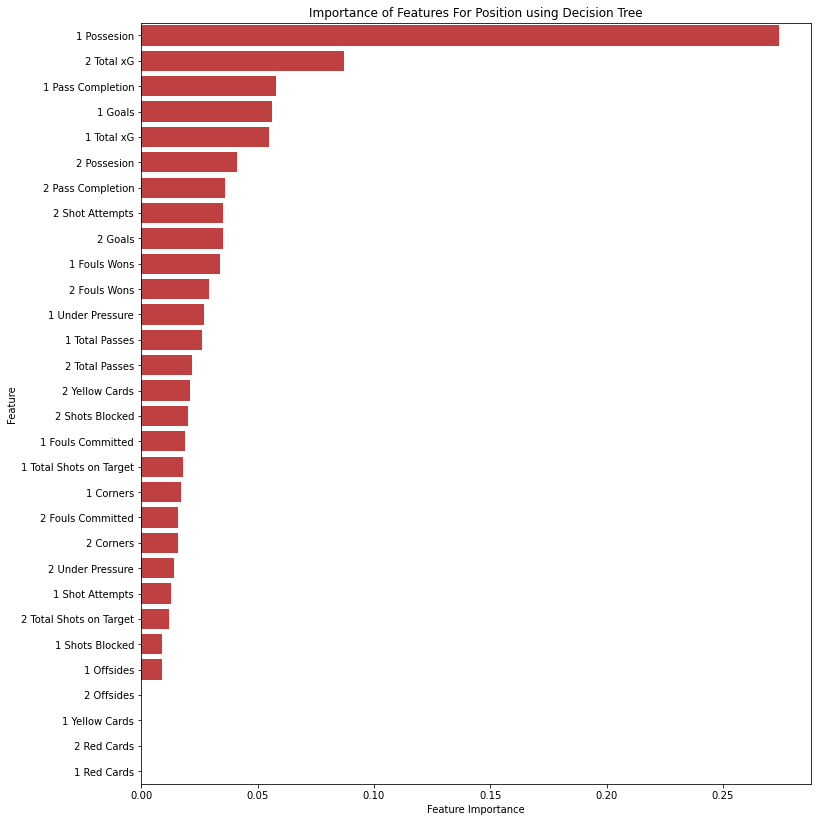

In [261]:
import matplotlib.pyplot as plt
import seaborn as sns

important_features = pd.DataFrame({'feature':df.columns[:30],'importance':np.round(clf.feature_importances_,3)})
important_features = important_features.sort_values('importance',ascending=False)
 
f, ax = plt.subplots(figsize=(12, 14))
g = sns.barplot(x='importance', y='feature', data=important_features,
                color="red", saturation=.5, label="Total")
g.set(xlabel='Feature Importance', ylabel='Feature', title='Importance of Features For Position using Decision Tree')
plt.show()